In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# GENERAMOS DATA

In [4]:
X,y,c = make_blobs(500,cluster_std=0.8,centers=4,n_features=2,return_centers=True)

In [6]:
df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1],
        'y':y
    }
)
df_blobs

,x1,x2,y
0,-5.926494,5.860323,3
1,0.610461,-6.586853,2
2,-4.412453,-6.159880,1
3,9.134220,-3.757678,0
4,-4.157958,6.636627,3
...,...,...,...
495,2.009735,-6.899297,2
496,-5.331071,5.469380,3
497,11.674082,-3.964440,0
498,-5.871893,5.261476,3


In [7]:
df_centers = pd.DataFrame(
    {
        'x1':c[:,0],
        'x2':c[:,1]
    }
)
df_centers

,x1,x2
0,9.895185,-3.831706
1,-3.351737,-4.976319
2,1.072592,-6.743383
3,-5.382716,5.758361


# GRAFICAMOS LOS DATOS

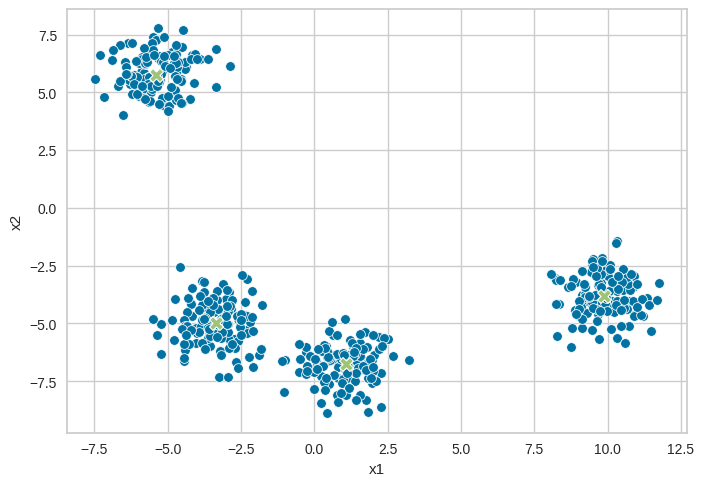

In [8]:
sns.scatterplot(data=df_blobs,x='x1',y='x2')
sns.scatterplot(data=df_centers,x='x1',y='x2',marker='X',s=100)
plt.show()

# APLICAMOS K-MEANS

In [9]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame({
    'x1':k_means_centers[:,0],
    'x2':k_means_centers[:,1]
})
df_k_means_center

,x1,x2
0,-5.369386,5.847582
1,1.022045,-6.756939
2,9.864004,-3.790220
3,-3.377856,-4.994873


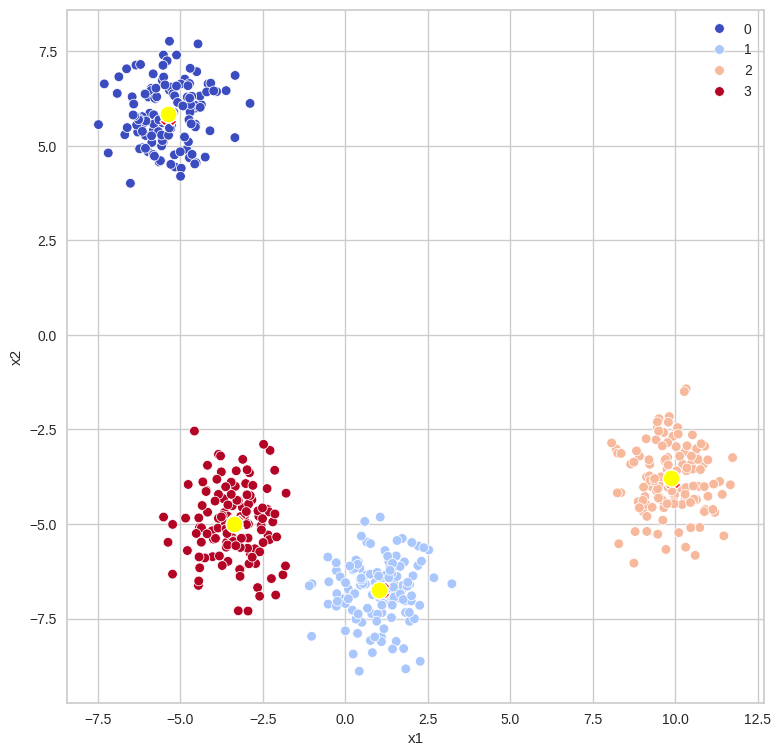

In [11]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,x='x1',y='x2',hue='cluster',palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()

In [12]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


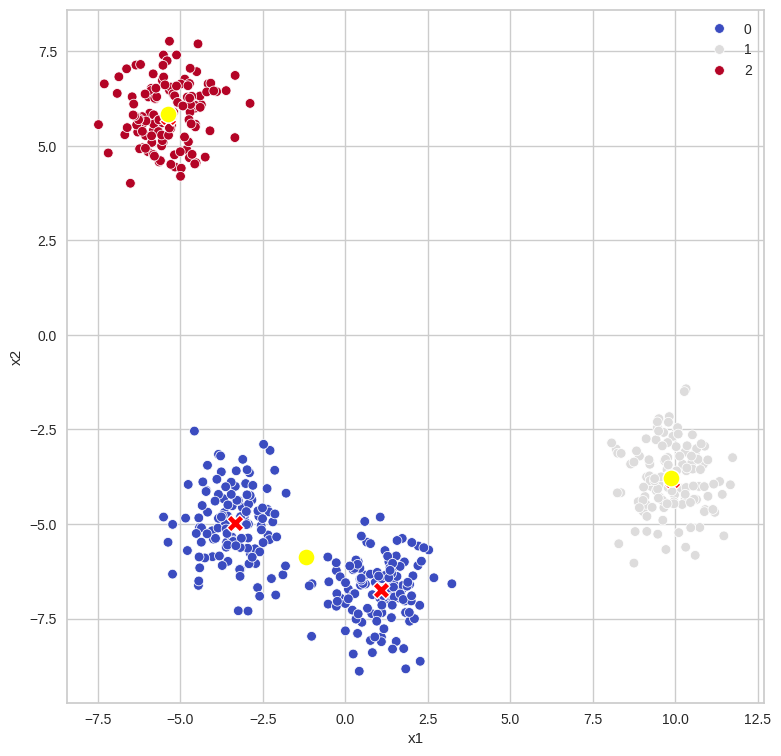

4


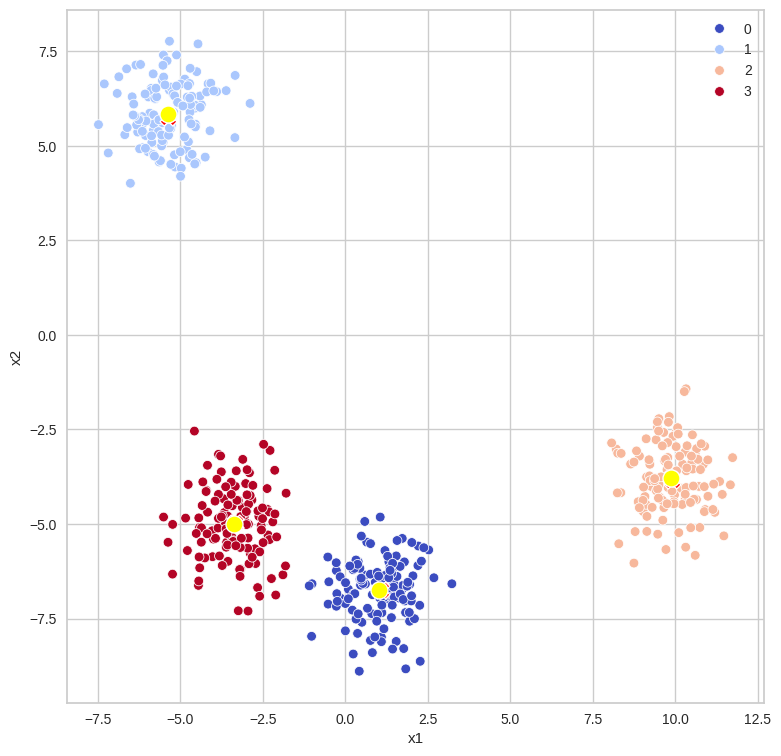

5


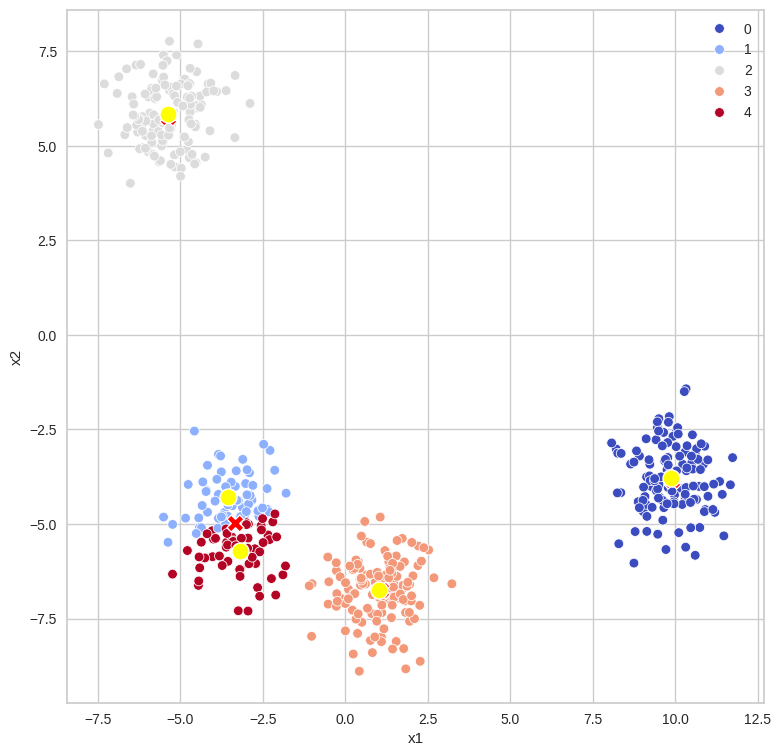

6


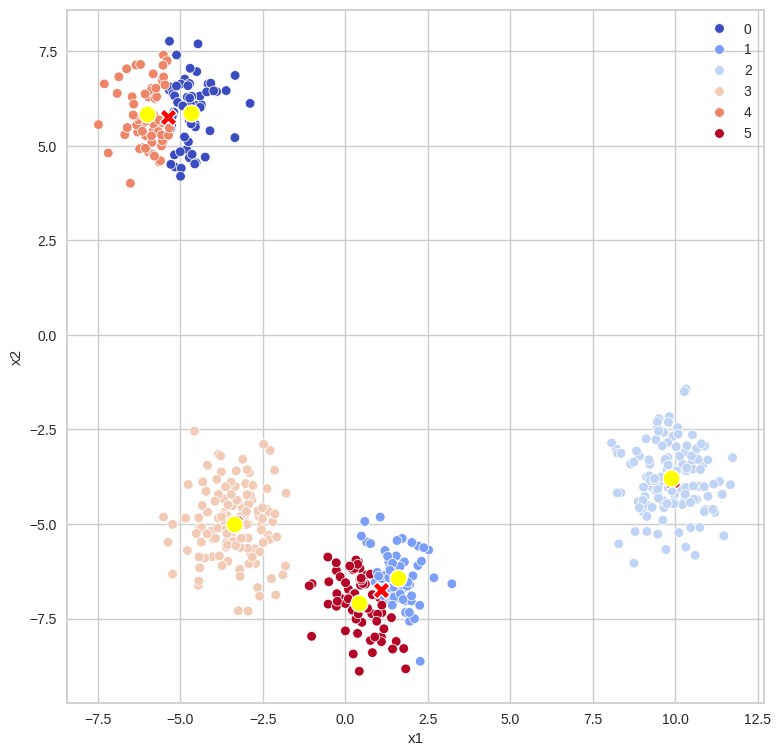

In [13]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

# ENCONTRAMOS EL VALOR IDEAL DE K

# COEFICIENTE DE SILUETA

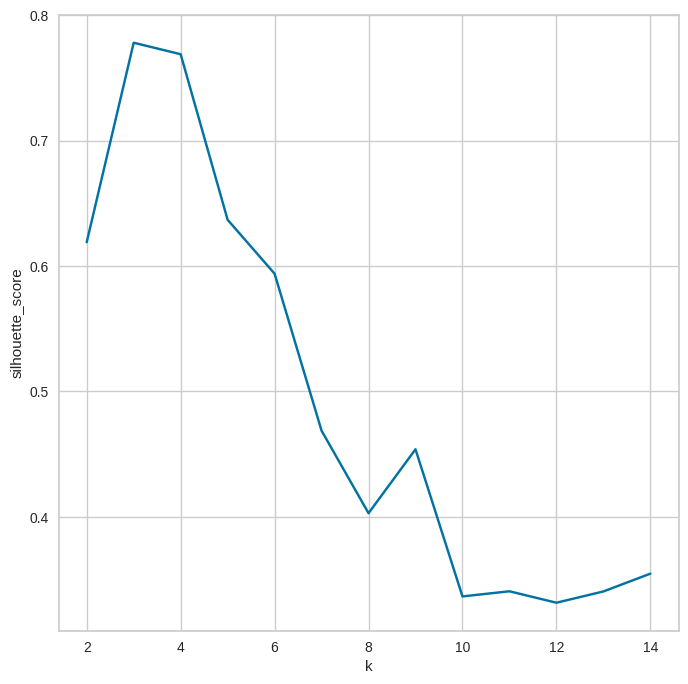

In [14]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  y = km.predict(X)
  silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

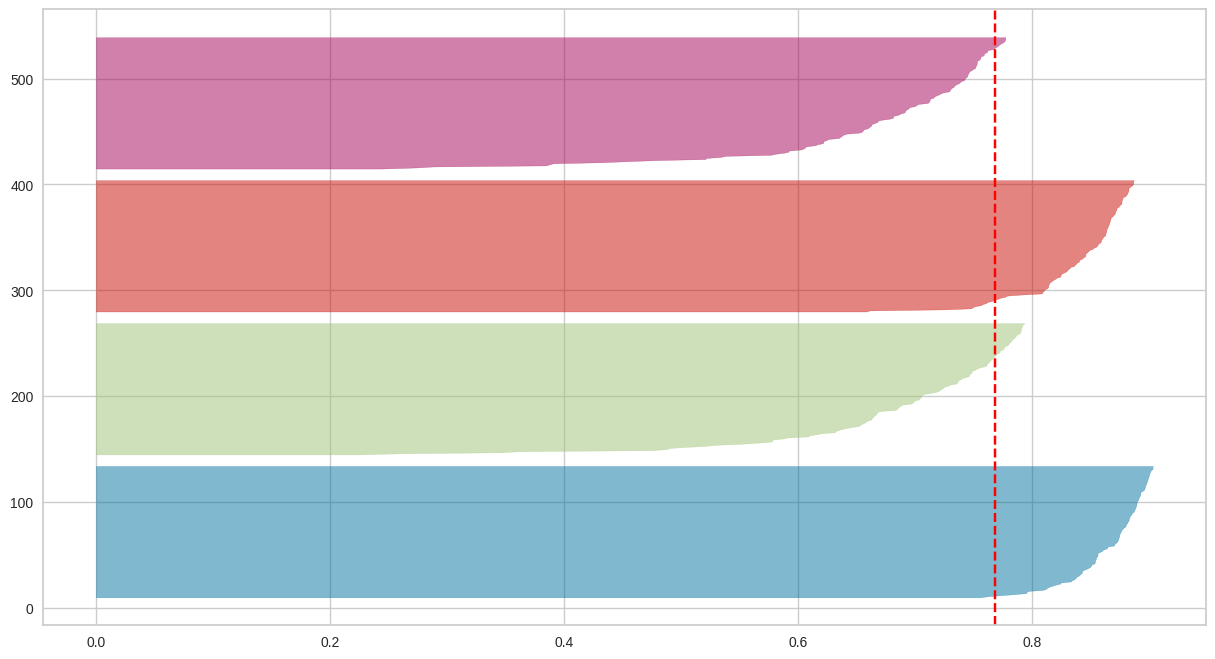

In [15]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)